# Exploratory Data Analysis to Identify Factors Influencing Depression Among Students

# Problem Statement
Student mental health is becoming a serious global concern, with academic pressure, financial stress, social expectations, and lifestyle choices contributing to increased levels of depression among students. Educational institutions often lack data-driven insights that can help identify at-risk students early. The given dataset contains information about students’ demographics, academic life, lifestyle habits, family background, and mental health indicators, including depression levels.

## 1) Dataset loading and understanding the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\Hp\Desktop\MyWorks\Innomatics\EDA Daily Task\Data set\student_depression_dataset.csv")
data.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33,Visakhapatnam,Student,5,0,8.97,2,0,'5-6 hours',Healthy,B.Pharm,Yes,3,1,No,1
1,8,Female,24,Bangalore,Student,2,0,5.90,5,0,'5-6 hours',Moderate,BSc,No,3,2,Yes,0
2,26,Male,31,Srinagar,Student,3,0,7.03,5,0,'Less than 5 hours',Healthy,BA,No,9,1,Yes,0
3,30,Female,28,Varanasi,Student,3,0,5.59,2,0,'7-8 hours',Moderate,BCA,Yes,4,5,Yes,1
4,32,Female,25,Jaipur,Student,4,0,8.13,3,0,'5-6 hours',Moderate,M.Tech,Yes,1,1,No,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  int64  
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  int64  
 6   Work Pressure                          27901 non-null  int64  
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  int64  
 9   Job Satisfaction                       27901 non-null  int64  
 10  Sleep Duration                         27901 non-null  object 
 11  Di

## Overview of Dataset
The dataset contains 27,901 student records with 18 features covering demographics, academic and work pressure, lifestyle habits, and mental health indicators. It includes 9 numerical and 9 categorical variables, with no missing values, making the data clean and ready for analysis. Key attributes such as Academic Pressure, Work Pressure, CGPA, Sleep Duration, Financial Stress, and Family History of Mental Illness help assess factors affecting student well-being. The target variable Depression (0 = No, 1 = Yes) allows for mental health pattern analysis. Overall, the dataset provides a comprehensive foundation for exploring how lifestyle, academic stress, and personal factors contribute to student depression.

In [4]:
data.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

#### Converting all the columns name in lower and replace the space with underscore for better analysis purpose

In [5]:
data.columns = data.columns.str.lower().str.replace(' ','_')

In [6]:
data.columns

Index(['id', 'gender', 'age', 'city', 'profession', 'academic_pressure',
       'work_pressure', 'cgpa', 'study_satisfaction', 'job_satisfaction',
       'sleep_duration', 'dietary_habits', 'degree',
       'have_you_ever_had_suicidal_thoughts_?', 'work/study_hours',
       'financial_stress', 'family_history_of_mental_illness', 'depression'],
      dtype='object')

## Basic operations

In [7]:
data.head()

,id,gender,age,city,profession,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,have_you_ever_had_suicidal_thoughts_?,work/study_hours,financial_stress,family_history_of_mental_illness,depression
0,2,Male,33,Visakhapatnam,Student,5,0,8.97,2,0,'5-6 hours',Healthy,B.Pharm,Yes,3,1,No,1
1,8,Female,24,Bangalore,Student,2,0,5.90,5,0,'5-6 hours',Moderate,BSc,No,3,2,Yes,0
2,26,Male,31,Srinagar,Student,3,0,7.03,5,0,'Less than 5 hours',Healthy,BA,No,9,1,Yes,0
3,30,Female,28,Varanasi,Student,3,0,5.59,2,0,'7-8 hours',Moderate,BCA,Yes,4,5,Yes,1
4,32,Female,25,Jaipur,Student,4,0,8.13,3,0,'5-6 hours',Moderate,M.Tech,Yes,1,1,No,0


In [8]:
data.tail()

,id,gender,age,city,profession,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,have_you_ever_had_suicidal_thoughts_?,work/study_hours,financial_stress,family_history_of_mental_illness,depression
27896,140685,Female,27,Surat,Student,5,0,5.75,5,0,'5-6 hours',Unhealthy,'Class 12',Yes,7,1,Yes,0
27897,140686,Male,27,Ludhiana,Student,2,0,9.40,3,0,'Less than 5 hours',Healthy,MSc,No,0,3,Yes,0
27898,140689,Male,31,Faridabad,Student,3,0,6.61,4,0,'5-6 hours',Unhealthy,MD,No,12,2,No,0
27899,140690,Female,18,Ludhiana,Student,5,0,6.88,2,0,'Less than 5 hours',Healthy,'Class 12',Yes,10,5,No,1
27900,140699,Male,27,Patna,Student,4,0,9.24,1,0,'Less than 5 hours',Healthy,BCA,Yes,2,3,Yes,1


In [9]:
data.shape

(27901, 18)

In [10]:
data.dtypes

id                                         int64
gender                                    object
age                                        int64
city                                      object
profession                                object
academic_pressure                          int64
work_pressure                              int64
cgpa                                     float64
study_satisfaction                         int64
job_satisfaction                           int64
sleep_duration                            object
dietary_habits                            object
degree                                    object
have_you_ever_had_suicidal_thoughts_?     object
work/study_hours                           int64
financial_stress                          object
family_history_of_mental_illness          object
depression                                 int64
dtype: object

In [11]:
data.describe()

,id,age,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,work/study_hours,depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000


In [12]:
for i in data.columns:
    if i=='id':
        pass
    else:
        print("Value Counts for "+i)
        print("=="*25)
        print(data[i].value_counts())
        print("=="*25)

Value Counts for gender
gender
Male      15547
Female    12354
Name: count, dtype: int64
Value Counts for age
age
24    2258
20    2237
28    2133
29    1950
33    1893
25    1784
21    1726
23    1645
18    1587
19    1560
34    1468
27    1462
31    1427
32    1262
22    1160
26    1155
30    1145
35      10
38       8
36       7
42       4
39       3
48       3
46       2
43       2
37       2
44       1
51       1
49       1
58       1
54       1
59       1
56       1
41       1
Name: count, dtype: int64
Value Counts for city
city
Kalyan                  1570
Srinagar                1372
Hyderabad               1340
Vasai-Virar             1290
Lucknow                 1155
Thane                   1139
Ludhiana                1111
Agra                    1094
Surat                   1078
Kolkata                 1066
Jaipur                  1036
Patna                   1007
Visakhapatnam            969
Pune                     968
Ahmedabad                951
Bhopal                  

## Data Cleaning

In [13]:
data.isna().sum()

id                                       0
gender                                   0
age                                      0
city                                     0
profession                               0
academic_pressure                        0
work_pressure                            0
cgpa                                     0
study_satisfaction                       0
job_satisfaction                         0
sleep_duration                           0
dietary_habits                           0
degree                                   0
have_you_ever_had_suicidal_thoughts_?    0
work/study_hours                         0
financial_stress                         0
family_history_of_mental_illness         0
depression                               0
dtype: int64

In [14]:
data.duplicated().sum()

np.int64(0)

#### 1.Average depression score by gender

In [15]:
pd.pivot_table(data,values='depression',index='gender',aggfunc='mean')

,depression
gender,
Female,0.584507
Male,0.586287


#### Average academic pressure by degree and gender

In [16]:
pd.pivot_table(data,values='academic_pressure',
               index='degree',
               columns='gender',
               aggfunc='mean')

gender,Female,Male
degree,,
'Class 12',3.377449,3.344889
B.Arch,3.093151,3.034759
B.Com,3.063063,3.098810
B.Ed,3.136304,3.106884
B.Pharm,3.194070,3.179954
B.Tech,3.202073,3.016971
BA,3.042623,3.179661
BBA,3.090634,3.046575
BCA,3.194763,3.075426


#### Depression count by financial stress and sleep duration

In [17]:
pd.pivot_table(data,
               values='depression',
               index='financial_stress',
               columns='sleep_duration',
               aggfunc='sum')


sleep_duration,'5-6 hours','7-8 hours','Less than 5 hours','More than 8 hours',Others
financial_stress,,,,,
1,341.0,393.0,627.0,270.0,1.0
2,514.0,569.0,670.0,421.0,1.0
3,685.0,848.0,980.0,565.0,2.0
4,885.0,1129.0,1226.0,748.0,2.0
5,1091.0,1432.0,1858.0,1074.0,3.0
?,1.0,NaN,0.0,NaN,NaN


#### Top 10 Cities by Work/Study Hours (Descending Order)

In [18]:
top_10_cities = data.groupby('city')['work/study_hours'].sum().sort_values(ascending=False).head(10).reset_index()

In [19]:
top_10_cities

,city,work/study_hours
0,Kalyan,11168
1,Hyderabad,9838
2,Vasai-Virar,9502
3,Srinagar,9445
4,Lucknow,8364
5,Ludhiana,8109
6,Thane,7914
7,Surat,7828
8,Kolkata,7666
9,Agra,7600


In [20]:
data.head()

,id,gender,age,city,profession,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,have_you_ever_had_suicidal_thoughts_?,work/study_hours,financial_stress,family_history_of_mental_illness,depression
0,2,Male,33,Visakhapatnam,Student,5,0,8.97,2,0,'5-6 hours',Healthy,B.Pharm,Yes,3,1,No,1
1,8,Female,24,Bangalore,Student,2,0,5.90,5,0,'5-6 hours',Moderate,BSc,No,3,2,Yes,0
2,26,Male,31,Srinagar,Student,3,0,7.03,5,0,'Less than 5 hours',Healthy,BA,No,9,1,Yes,0
3,30,Female,28,Varanasi,Student,3,0,5.59,2,0,'7-8 hours',Moderate,BCA,Yes,4,5,Yes,1
4,32,Female,25,Jaipur,Student,4,0,8.13,3,0,'5-6 hours',Moderate,M.Tech,Yes,1,1,No,0


## Univariate Analysis for categorical data

<Axes: xlabel='gender', ylabel='count'>

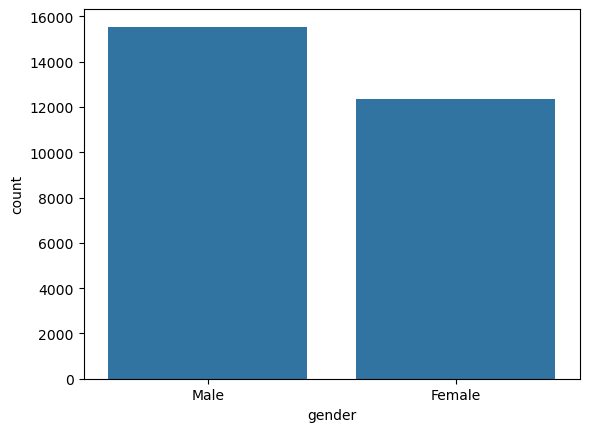

In [21]:
sns.countplot(data=data,x='gender')

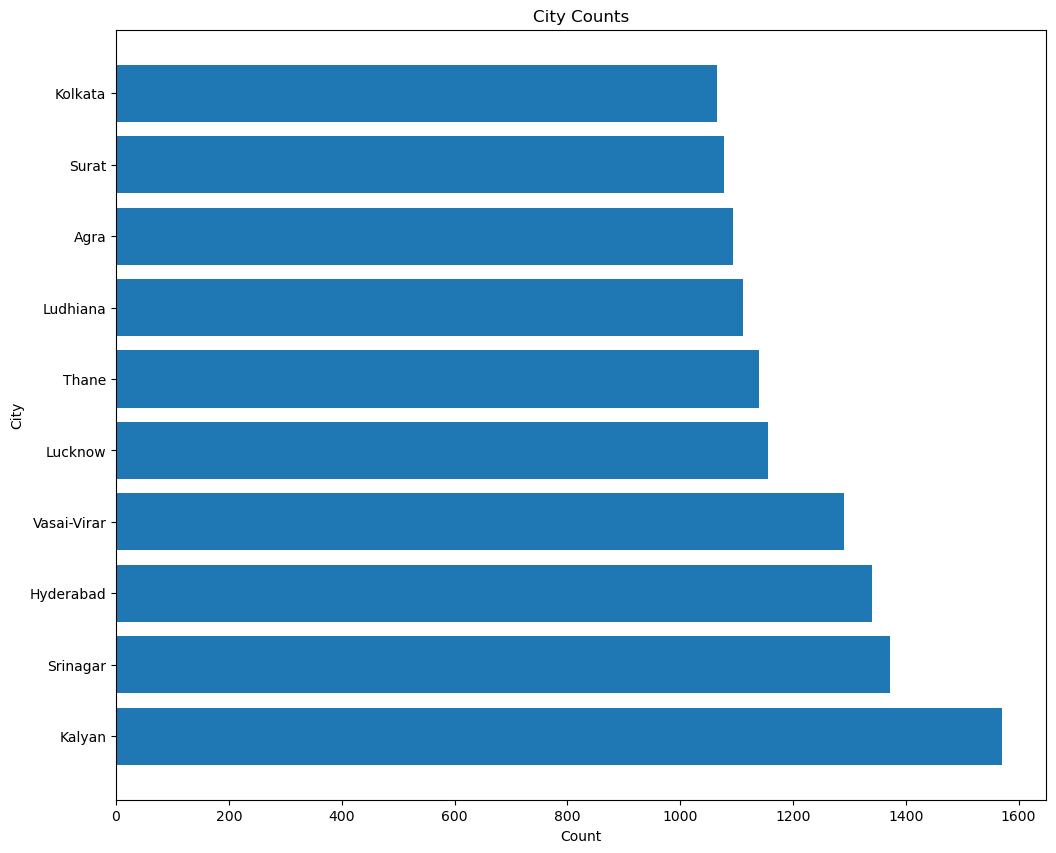

In [22]:
city_counts = data['city'].value_counts().head(10)
plt.figure(figsize=(12,10))
plt.barh(city_counts.index, city_counts.values) 
plt.title("City Counts")
plt.xlabel("Count")
plt.ylabel("City")
plt.show()

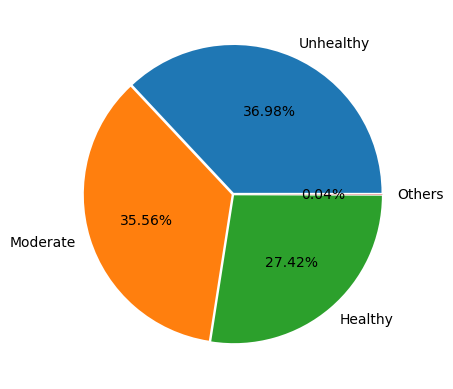

In [23]:
a = data['dietary_habits'].value_counts()
plt.pie(a.values,labels=a.index,autopct='%.2f%%',explode=[0.01,0.01,0.01,0.01])
plt.show()

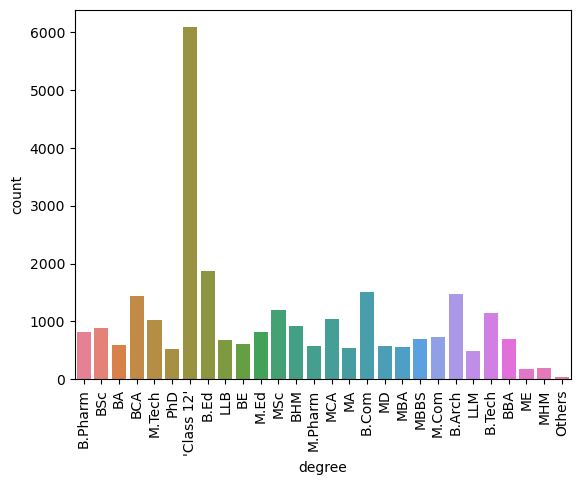

In [24]:
sns.countplot(data=data,x='degree',hue='degree')
plt.xticks(rotation=90)
plt.show()

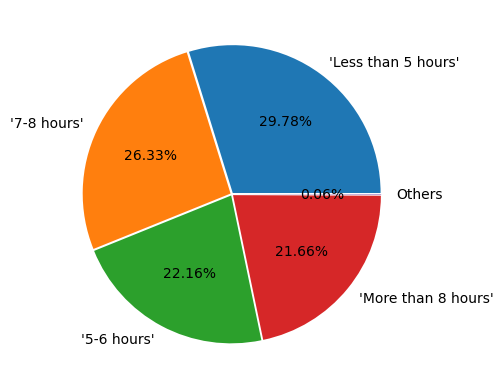

In [25]:
a = data['sleep_duration'].value_counts()
plt.pie(a.values,labels=a.index,autopct='%.2f%%',explode=[0.01,0.01,0.01,0.01,0.01])
plt.show()

## Univariate analysis for Numerical Data

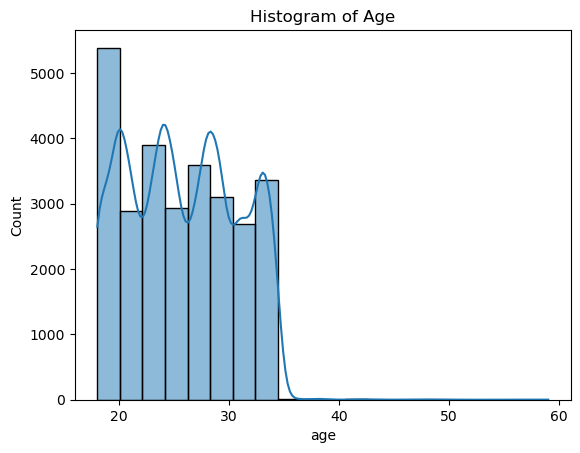

In [26]:
sns.histplot(data['age'], kde=True, bins=20)
plt.title("Histogram of Age")
plt.show()

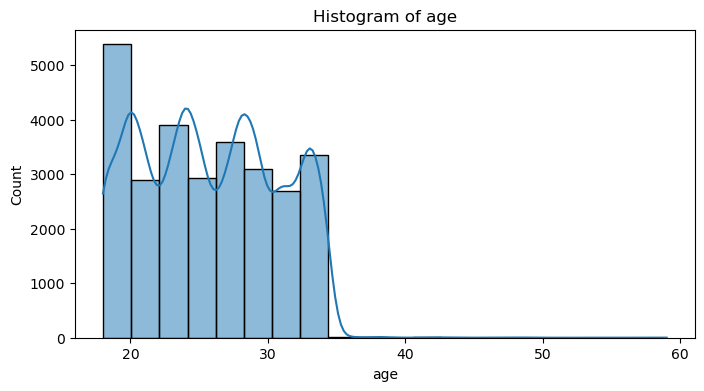

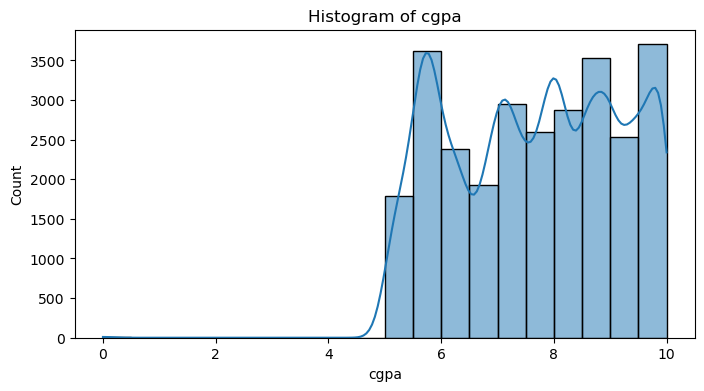

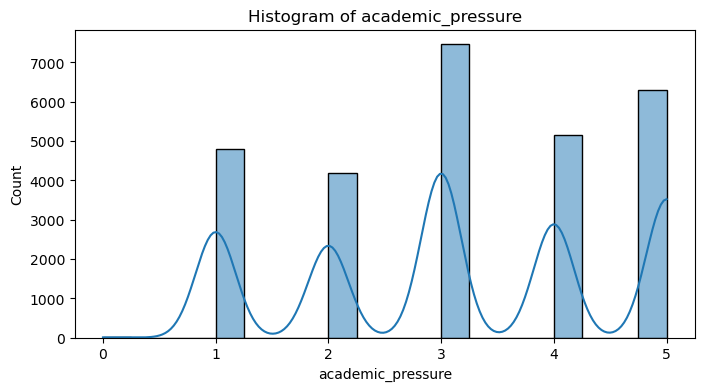

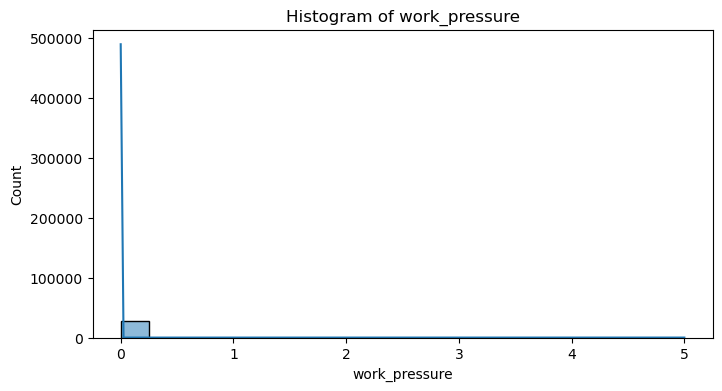

In [27]:
num_cols = ['age', 'cgpa', 'academic_pressure', 'work_pressure']

for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(data[col], kde=True, bins=20)
    plt.title(f"Histogram of {col}")
    plt.show()


## Bi-Variate Analysis

### 1.Depression vs Gender

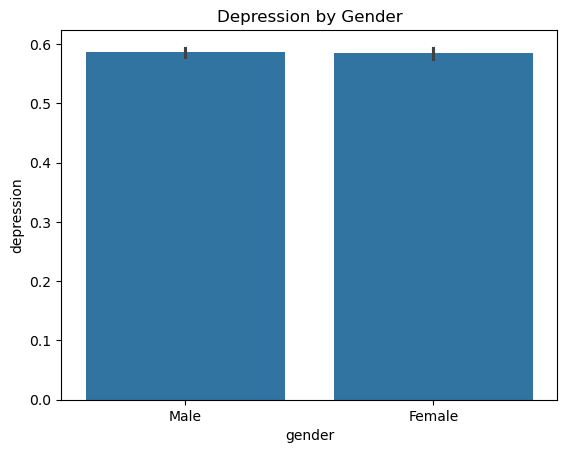

In [28]:
sns.barplot(x='gender', y='depression', data=data)
plt.title("Depression by Gender")
plt.show()

### 2.Sleep Duration vs Academic Pressure

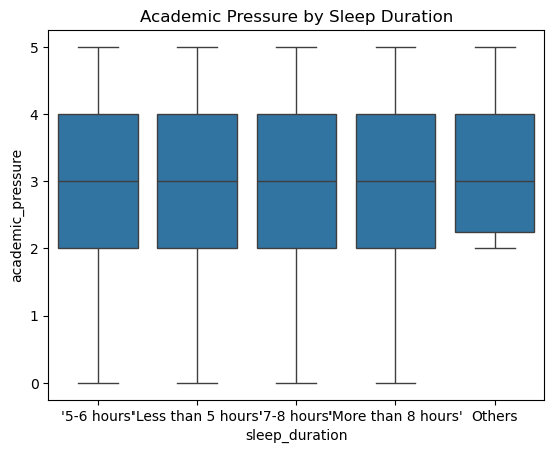

In [29]:
sns.boxplot(x='sleep_duration', y='academic_pressure', data=data)
plt.title("Academic Pressure by Sleep Duration")
plt.show()

### 3.Financial Stress vs Depression

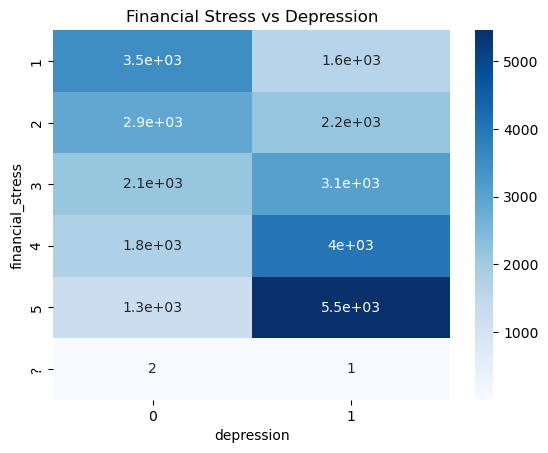

In [30]:
ct = pd.crosstab(data['financial_stress'], data['depression'])
sns.heatmap(ct, annot=True, cmap='Blues')
plt.title("Financial Stress vs Depression")
plt.show()

### 4.Gender vs Suicidal Thoughts

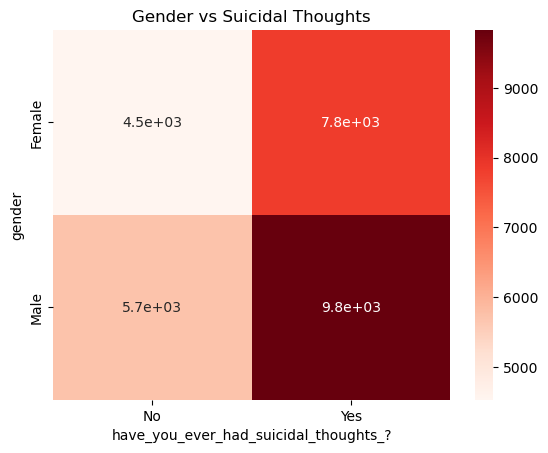

In [31]:
ct = pd.crosstab(data['gender'], data['have_you_ever_had_suicidal_thoughts_?'])
sns.heatmap(ct, annot=True, cmap='Reds')
plt.title("Gender vs Suicidal Thoughts")
plt.show()


### 5.Dietary Habits vs Depression

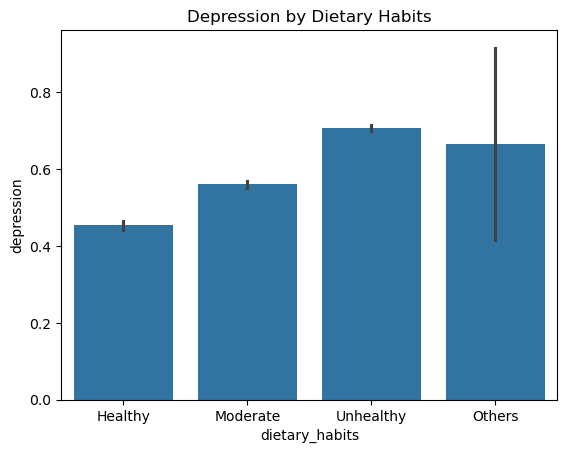

In [32]:
sns.barplot(x='dietary_habits', y='depression', data=data)
plt.title("Depression by Dietary Habits")
plt.show()

## Multivariate Analysis

### Grouped Barplots (3 variables)

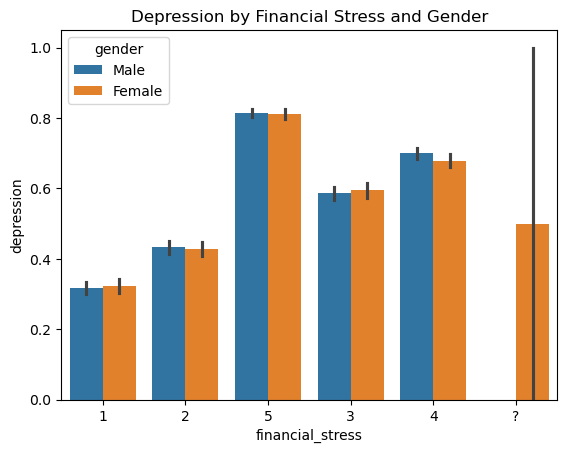

In [33]:
sns.barplot(x="financial_stress", y="depression", hue="gender", data=data)
plt.title("Depression by Financial Stress and Gender")
plt.show()


## Boxplot with Hue (3-variable analysis)

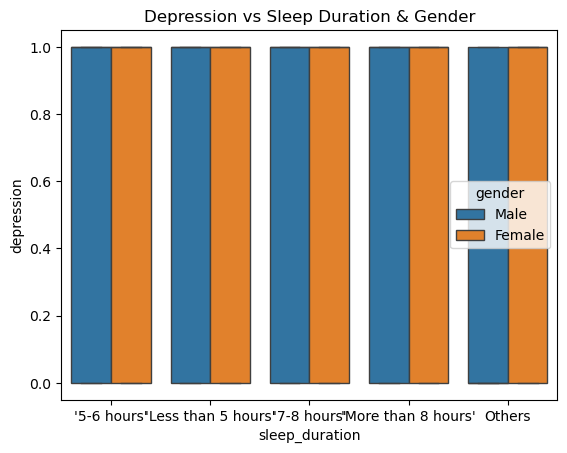

In [34]:
sns.boxplot(x="sleep_duration", y="depression", hue="gender", data=data)
plt.title("Depression vs Sleep Duration & Gender")
plt.show()


## Stacked Bar Chart (3 variables)

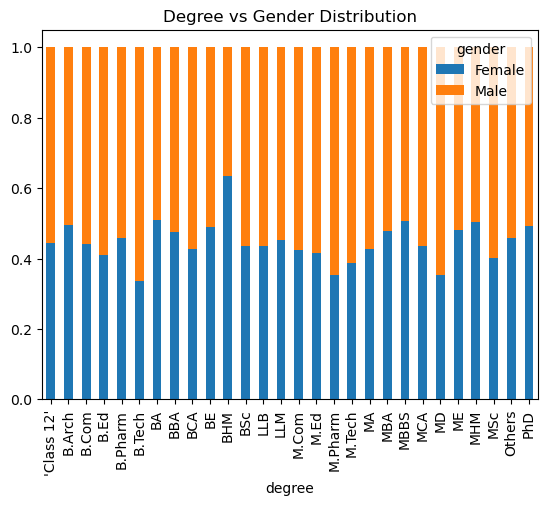

In [35]:
pd.crosstab(data['degree'], data['gender'], normalize='index').plot(kind='bar', stacked=True)
plt.title("Degree vs Gender Distribution")
plt.show()

# Upload the dataset into MySQL Workbench

In [36]:
from sqlalchemy import create_engine

username = 'root'
password = 'root'
host = 'localhost'
port = '3306'
database = 'students_health'

# Create MySQL engine
engine = create_engine(f'mysql+pymysql://{username}:{password}@{host}:{port}/{database}')
table_name = 'students'

# Write DataFrame to MySQL table
data.to_sql(table_name,engine,if_exists='replace',index=False)

27901

In [37]:
data.columns

Index(['id', 'gender', 'age', 'city', 'profession', 'academic_pressure',
       'work_pressure', 'cgpa', 'study_satisfaction', 'job_satisfaction',
       'sleep_duration', 'dietary_habits', 'degree',
       'have_you_ever_had_suicidal_thoughts_?', 'work/study_hours',
       'financial_stress', 'family_history_of_mental_illness', 'depression'],
      dtype='object')

In [63]:
print(len(data[data['have_you_ever_had_suicidal_thoughts_?']=='Yes'])) # to find the count
print(data[data['have_you_ever_had_suicidal_thoughts_?']=='Yes'].shape[0]) # to find the count

17656
17656


In [64]:
data.head()

,id,gender,age,city,profession,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,have_you_ever_had_suicidal_thoughts_?,work/study_hours,financial_stress,family_history_of_mental_illness,depression
0,2,Male,33,Visakhapatnam,Student,5,0,8.97,2,0,'5-6 hours',Healthy,B.Pharm,Yes,3,1,No,1
1,8,Female,24,Bangalore,Student,2,0,5.90,5,0,'5-6 hours',Moderate,BSc,No,3,2,Yes,0
2,26,Male,31,Srinagar,Student,3,0,7.03,5,0,'Less than 5 hours',Healthy,BA,No,9,1,Yes,0
3,30,Female,28,Varanasi,Student,3,0,5.59,2,0,'7-8 hours',Moderate,BCA,Yes,4,5,Yes,1
4,32,Female,25,Jaipur,Student,4,0,8.13,3,0,'5-6 hours',Moderate,M.Tech,Yes,1,1,No,0


In [72]:
len(data[
(data['have_you_ever_had_suicidal_thoughts_?']=='Yes') & 
(data['depression']==1)
])

13957